<a href="https://colab.research.google.com/github/SergeiSa/Control-Theory-Slides-Spring-2021/blob/main/ColabNotebooks/Lab2_Control2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear system with one control input

## Step 1

Consider the following to a second order ODE:

$$
\dot x = 
\begin{pmatrix} 
1 & 0 \\ -5 & -10
\end{pmatrix}
x 
$$

The eigenvalues are $\lambda_1 = -10$ and $\lambda_1 = 1$, so unstable. 

## Step 2

Now let's consider the same system, but with control input:

$$
\dot x = 
\begin{pmatrix} 
1 & 0 \\ -5 & -10
\end{pmatrix}
x 
+
\begin{pmatrix} 
1 \\ 0
\end{pmatrix}
u
$$

Let us chose that $u = -2x_1$, in other words:

$$
u = 
\begin{pmatrix} 
-2 & 0
\end{pmatrix}
x
$$

Then we can re-write this as:

$$
\dot x = 
\begin{pmatrix} 
1 & 0 \\ -5 & -10
\end{pmatrix}
x 
+
\begin{pmatrix} 
1 \\ 0
\end{pmatrix}
\begin{pmatrix} 
-2 & 0
\end{pmatrix}
x
$$

$$
\dot x = 
\begin{pmatrix} 
1 & 0 \\ -5 & -10
\end{pmatrix}
x 
+
\begin{pmatrix} 
-2 & 0 \\ 0 & 0
\end{pmatrix}
x
$$


$$
\dot x = 
\begin{pmatrix} 
-1 & 0 \\ -5 & -10
\end{pmatrix}
x
$$

Now the eigenvalues are $\lambda_1 = -10$ and $\lambda_1 = -1$, so stable. 

In [ ]:

import numpy as np
from numpy.linalg import eig

A = np.array([[1, 0], [-5, -10]]) # state matrix
e, v = eig(A)
print("eigenvalues of A:", e)

A = np.array([[-1, 0], [-5, -10]]) # state matrix
e, v = eig(A)
print("eigenvalues of A:", e)

eigenvalues of A: [-10.   1.]
eigenvalues of A: [-10.  -1.]


# Pole placement

There is a technique for finding suitable $K$ matrix that would produced desired eigenvalues of the $A - BK$ system. It is called pole placement.

Watch the intoduction to pole placement for self-study: [link](https://www.youtube.com/watch?v=FXSpHy8LvmY&ab_channel=MATLAB). Notice the difference between the approach to "steady state" control design show there, and in the lecture.

In [ ]:
import numpy as np
from numpy.linalg import eig
from scipy.integrate import odeint
from scipy.signal import place_poles

n = 2
A = np.array([[1, 0], [-5, -10]])
B = np.array([[1], [0]])

# x_dot from state space
def StateSpace(x, t):
    return A.dot(x)# + B*np.sin(t)

time = np.linspace(0, 1, 1000)   
x0 = np.random.rand(n)  # initial state

solution = {"SS": odeint(StateSpace, x0, time)}

#desired eigenvalues
poles = np.array([-1, -2])
place_obj = place_poles(A, B, poles)

#found control gains
K = place_obj.gain_matrix;
print("K:", K)

#test that eigenvalues of the closed loop system are what they are supposed to be 
e, v = eig((A - B.dot(K)))
print("eigenvalues of A - B*K:", e)

K: [[ -6.  -14.4]]
eigenvalues of A - B*K: [-1. -2.]


In [ ]:
#desired eigenvalues
poles = np.array([-100, -200])
place_obj = place_poles(A, B, poles)

#found control gains
K = place_obj.gain_matrix;
print("K:", K)

#test that eigenvalues of the closed loop system are what they are supposed to be 
e, v = eig((A - B.dot(K)))
print("eigenvalues of A - B*K:", e)

#notice how different the gain matrix is!

K: [[  291. -3420.]]
eigenvalues of A - B*K: [-200. -100.]


## Task 1.1 Make the following systems stable, proposing appropriate control


$$\dot x = 
\begin{pmatrix} 10 & 0 \\ -5 & 10
\end{pmatrix}
x
+
\begin{pmatrix} 
2 \\ 0
\end{pmatrix}
u
$$


$$\dot x = 
\begin{pmatrix} 0 & -8 \\ 1 & 30
\end{pmatrix}
x
+
\begin{pmatrix} 
-2 \\ 1
\end{pmatrix}
u
$$


$$\dot x = 
\begin{pmatrix} 2 & 2 \\ -6 & 10
\end{pmatrix}
x
+
\begin{pmatrix} 
0 \\ 5
\end{pmatrix}
u
$$


$$\dot x = 
\begin{pmatrix} 5 & -5 \\ 6 & 15
\end{pmatrix}
x
+
\begin{pmatrix} 
-10 \\ 10
\end{pmatrix}
u
$$

## Task 1.2 Make the following systems stable, proposing appropriate control

$$\dot x = 
\begin{pmatrix} 10 & 0 \\ -5 & 10
\end{pmatrix}
x
+
\begin{pmatrix} 
2 & 1 \\ 0 & -1
\end{pmatrix}
u
$$


$$\dot x = 
\begin{pmatrix} 0 & -8 \\ 1 & 30
\end{pmatrix}
x
+
\begin{pmatrix} 
-2 & 1 \\ 1 & 1
\end{pmatrix}
u
$$


$$\dot x = 
\begin{pmatrix} 2 & 2 \\ -6 & 10
\end{pmatrix}
x
+
\begin{pmatrix} 
0 & -1 \\ 5 & -1
\end{pmatrix}
u
$$


$$\dot x = 
\begin{pmatrix} 5 & -5 \\ 6 & 15
\end{pmatrix}
x
+
\begin{pmatrix} 
-10 & 3 \\ 10 & 3
\end{pmatrix}
u
$$

## Task 1.3 Give example of an unstable system that can't be stabilized...

of the form $\dot x = 
Ax+Bu$, where $A \in \mathbb{R}^{2 \times 2}$

* where $B \in \mathbb{R}^{2 \times 1}$
* where $B \in \mathbb{R}^{2 \times 2}$
* where $B \in \mathbb{R}^{2 \times 3}$

# Root locus

Consider the following question: given system $\dot x = Ax+Bu$ and control $u = 
-Kx$, how does the change in $K$ changes the eigenvalues of theresulting matrix $(A - BK)$?

Root locus method is drawing the graph of eigenvalues of the matrix $(A - BK)$ for a given change of matrix $K$. We only vary a single component of $K$, so the result is a line.

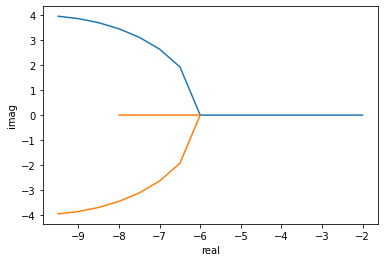

In [ ]:
import matplotlib.pyplot as plt

A = np.array([[1, -7], [2, -10]])
B = np.array([[1], [0]])
K0 = np.array([[1, 1]]);

k_min = 1;
k_max = 10;
k_step = 0.1;

Count = np.floor((k_max-k_min)/k_step)
Count = Count.astype(int)

k_range = np.linspace(k_min, k_max, Count)

E = np.zeros((Count, 4))

for i in range(Count):
    K0[0, 0] = k_range[i]

    ei, v = eig((A - B.dot(K0)))

    E[i, 0] = np.real(ei[0])
    E[i, 1] = np.imag(ei[0])
    E[i, 2] = np.real(ei[1])
    E[i, 3] = np.imag(ei[1])

    #print("eigenvalues of A - B*K:", ei)


plt.plot(E[:, 0], E[:, 1])
plt.plot(E[:, 2], E[:, 3])
plt.xlabel('real')
plt.ylabel('imag')
plt.show()


## Task 2.1 Plot root locus

* For a system with $A$ with imaginary eigenvalues
* For a system with $A$ with real eigenvalues
* For a system where real parts of eigenvalues of $(A - BK)$ are all positive
* For a system where real parts of eigenvalues of $(A - BK)$ are all negative

# Reaction to inputs

## Task 3 Step functions

### Task 3.1 Simulate one of the given systems with a step function as an imput.

### Task 3.2 Linear combination of solutions

Simulate one of the given systems with two different step functions $f_1$,  $f_2$ as an imput, and as a sum of those $f_1+f_2$ as an imput. Compare the sum of the solutions for the $f_1$,  $f_2$ with the solution for $f_1+f_2$.

$$ f_1 = 
\begin{cases} 
1, \ \ \ t \geq t_1 \\
0, \ \ \ t < t_1
\end{cases} 
$$
$$ f_2 = 
\begin{cases} 
1, \ \ \ t \geq t_2 \\
0, \ \ \ t < t_2
\end{cases} 
$$

## Task 4 Sinusoidal inputs

Simulate one of the prevuiously given function for a sinusoidal input $u = sin(wt)$.

How does the choice of $w$ affects the result?

(not graded):
Watch [video](https://youtu.be/bU7y051Ejgw) on "frequency responce" and find how you could use the proposed method to analyse the effect of $w$ in your problem.

Now, let us see how to plot ferquency responce in a plot, via scipy library:

num: [[ 0.  1. 10.]
 [ 0.  0.  2.]]
den: [1. 9. 4.]


Text(0.5, 0, 'Frequency [rad/sample]')

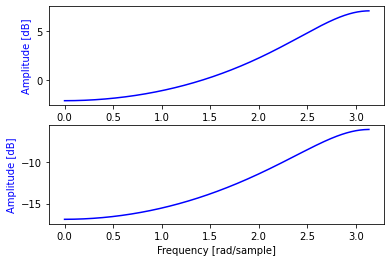

In [ ]:
from scipy.signal import ss2tf
from scipy.signal import freqz


A = np.array([[1, -7], [2, -10]])
B = np.array([[1], [0]])
C = np.eye(2)
D = np.zeros((2, 1))

num, den = ss2tf(A, B, C, D)

print("num:", num)
print("den:", den)

w1, h1 = freqz(num[0, :], den)
w2, h2 = freqz(num[1, :], den)

plt.subplot(211)
plt.plot(w1, 20 * np.log10(abs(h1)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency [rad/sample]')

plt.subplot(212)
plt.plot(w2, 20 * np.log10(abs(h2)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency [rad/sample]')

## Task 4.1 Make frequency diagrams for 2 of the systems you studied in the tasks 1.1 and 1.2

# 5. Point-to-point control

Given system:

$$\dot x = 
\begin{pmatrix} 10 & 5 \\ -5 & -10
\end{pmatrix}
x
+
\begin{pmatrix} 
-1 \\ 2
\end{pmatrix}
u
$$

let us drive it towards the point $x^* = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$

We define our control as:

$$u = 
-K (x - x^*) + u^*
$$

## Step 1 - Feed-forward design

We know that $\dot x^* = 0$ and that at the node our dynamics obtains the form:

$$0 = 
\begin{pmatrix} 10 & 5 \\ -5 & -10
\end{pmatrix}
\begin{pmatrix} 0 \\ 1 \end{pmatrix}
+
\begin{pmatrix} 
-1 \\ 2
\end{pmatrix}
u^*
$$

In other words, $u^* = 5$.

## Step 2

We define control error as $e = x - x^*$. 


Now we write error dynamics:

$$\dot x - \dot x^* = 
\begin{pmatrix} 10 & 5 \\ -5 & -10
\end{pmatrix}
x
 - 
\begin{pmatrix} 10 & 5 \\ -5 & -10
\end{pmatrix}
x^*
+
\begin{pmatrix} 
-1 \\ 2
\end{pmatrix}
(-K (x - x^*) + u^*)
-
\begin{pmatrix} 
-1 \\ 2
\end{pmatrix}
u^*
$$


$$\dot e = 
\begin{pmatrix} 10 & 5 \\ -5 & -10
\end{pmatrix}
e
-
\begin{pmatrix} 
-1 \\ 2
\end{pmatrix}
K e
$$


## Step 3 - feedback design

In [ ]:

A = np.array([[10, 5], [-5, -10]])
B = np.array([[-1], [2]])

#desired eigenvalues
poles = np.array([-1, -2])
place_obj = place_poles(A, B, poles)

#found control gains
K = place_obj.gain_matrix;
print("K:", K)

#test that eigenvalues of the closed loop system are what they are supposed to be 
e, v = eig((A - B.dot(K)))
print("eigenvalues of A - B*K:", e)

K: [[-13.26666667  -5.13333333]]
eigenvalues of A - B*K: [-2. -1.]


## Simulate forward wirth the found control

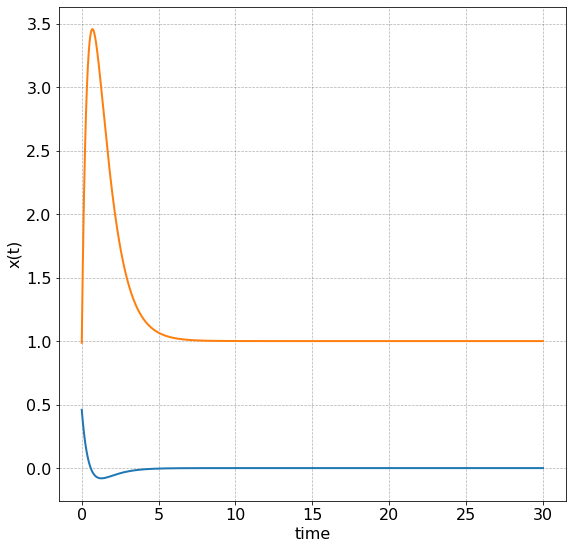

In [ ]:

x_desired = np.array([0, 1])
u_desired = np.array([5])


def StateSpace(x, t):
    u = -K.dot(x - x_desired) + u_desired
    return A.dot(x) + B.dot(u)

time = np.linspace(0, 30, 30000)   
x0 = np.random.rand(n)  # initial state

solution = {"solution_1": odeint(StateSpace, x0, time)}    


plt.rcParams['figure.figsize'] = [20, 20]

# plt.rcParams["font.family"] = "Old Times American"
plt.rcParams["font.size"] = 16
plt.rcParams["font.weight"] = 'normal'


# plt.subplot(221)
plt.plot(time, solution["solution_1"], linewidth=2)
plt.xlabel('time')
plt.ylabel('x(t)')
plt.grid(color='k', linestyle='--', linewidth=0.7, alpha=0.3)
# plt.title('autonomous')

## Task 5.1 Design point-to-point control and simulate two systems:

* where $B \in \mathbb{R}^{2 \times 1}$
* where $B \in \mathbb{R}^{2 \times 2}$

# 6. Discrete systems

Let's consider discrete system: $x_{i+1} = Ax_i + Bu_i$

## Task 6.1

Find which of the followig systems is stable:

$$x_{i+1} = 
\begin{pmatrix} 0.5 & 0.1 \\ -0.05 & 0.2
\end{pmatrix}
x_i
$$


$$x_{i+1} = 
\begin{pmatrix} 1 & -2 \\ 0 & 0.3
\end{pmatrix}
x_i
$$


$$x_{i+1} = 
\begin{pmatrix} -5 & 0 \\ -0.1 & 1
\end{pmatrix}
x_i
+
\begin{pmatrix} 
0 \\ 0.5
\end{pmatrix}
u_i, \ \ \ 
u_i = 
\begin{pmatrix} 
0 & 0.2
\end{pmatrix}
x_i
$$


$$x_{i+1} = 
\begin{pmatrix} -2.2 & -3 \\ 0 & 0.5
\end{pmatrix}
x_i
+
\begin{pmatrix} 
-1 \\ 1
\end{pmatrix}
u_i, \ \ \ 
u_i = 10
$$


## Task 6.2

Propose control that makes the following systems stable:

$$x_{i+1} = 
\begin{pmatrix} 1 & 1 \\ -0.4 & 0.1
\end{pmatrix}
x_i
+
\begin{pmatrix} 
0.5 \\ 0.5
\end{pmatrix}
u_i
$$


$$x_{i+1} = 
\begin{pmatrix} 0.8 & -0.3 \\ 0 & 0.15
\end{pmatrix}
x_i
+
\begin{pmatrix} 
-1 \\ 1
\end{pmatrix}
u_i
$$

## Simulation of descrete systems

Consider the system: $x_{i+1} = Ax_i$. Let us pick values for the matrix $A$ and simulate it forward.

eigenvalues of A: [ 0.83898669 -0.73898669]


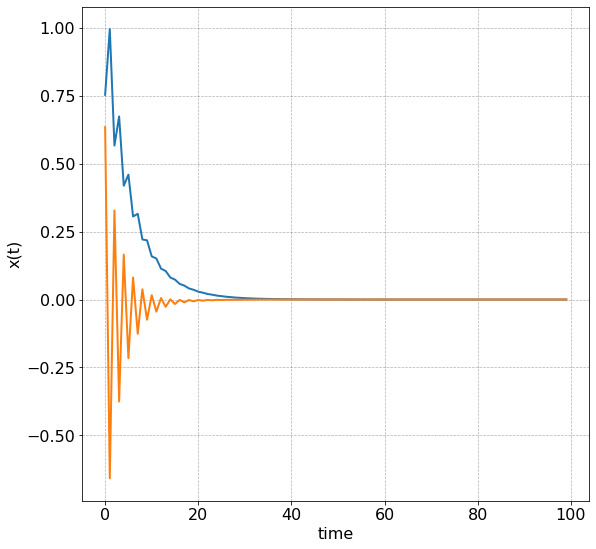

In [ ]:
A = np.array([[0.9, 0.5], [-0.2, -0.8]])

e, v = eig((A))
print("eigenvalues of A:", e)

Count = 100
time = np.zeros((Count))
dt = 0.01

x0 = np.random.rand(n)  # initial state
solution = np.zeros((Count, 2))
solution[0, :] = x0

for i in range(0, Count-1):
    x = solution[i, :]
    x = A.dot(x)
    solution[i+1, :] = np.reshape(x, (1, 2))
    time[i] = dt*i

plt.subplot(221)
plt.plot(range(0, Count), solution, linewidth=2)
plt.xlabel('time')
plt.ylabel('x(t)')
plt.grid(color='k', linestyle='--', linewidth=0.7, alpha=0.3)

## Task 6.3 Design point-to-point control and simulate two discrete systems:

* where $B \in \mathbb{R}^{2 \times 1}$
* where $B \in \mathbb{R}^{2 \times 2}$

# 7 Lyapunov equations

Solve Lyapunov equations for both discrete and continious systems to prove stability

In [ ]:
from scipy.linalg import solve_continuous_lyapunov
from scipy.linalg import solve_discrete_lyapunov


Q = np.array([[-1, 0], [0, -1]])

A = np.array([[-10, 5], [-5, -10]])
e, v = eig(A)
print("eig(A)", e)

P = solve_continuous_lyapunov(A, Q)
print("P", P)
e, v = eig((A.transpose().dot(P) + P.dot(A)))
print("eig(A'P + P*A)", e)
print(" ")
print(" ")


A = np.array([[0.9, 0.5], [-0.2, -0.8]])
e, v = eig(A)
print("eig(A)", e)

P = solve_discrete_lyapunov(A, Q)
print("P", P)
print("(A'PA - P + Q ):")
print(((A.dot(P)).dot(A.transpose()) - P + Q))




eig(A) [-10.+5.j -10.-5.j]
P [[ 5.00000000e-02  7.34706413e-20]
 [-1.24900090e-18  5.00000000e-02]]
eig(A'P + P*A) [-1. -1.]
 
 
eig(A) [ 0.83898669 -0.73898669]
P [[-4.03347296  0.9268445 ]
 [ 0.9268445  -2.40207966]]
(A'PA - P + Q ):
[[0.00000000e+00 3.33066907e-16]
 [1.11022302e-16 4.44089210e-16]]


## Task 7.1 

Choose one of the continious and one of the discrete systems for which you designed control, and prove stability of the closed-loop version $(A - BK)$